In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
books = pd.read_csv('books.csv')

In [11]:
# Q1: How many rows and columns are there in books.csv dataset?
# no. of rows and columns
rows, columns = books.shape
print(f"rows = {rows}, columns = {columns}")

rows = 399, columns = 24


In [12]:
# Q2: How many books do not have an original title?
# no.of books not having original title
books_without_original_title = books['original_title'].isnull().sum()
print(f"no.of books not having original title = {books_without_original_title}")

no.of books not having original title = 36


In [17]:
# Q3: How many unique books are present in the dataset? Evaluate based on the 'book_id' after removing null values in the original_title column.
# unique books in the dataset which are having non-null values in the original_title
books = books.dropna(subset=['original_title'])
rows, columns = books.shape
print(f"rows = {rows}, columns = {columns}")
unique_books = books['book_id'].nunique()
print(f"no of unique books which are non-null original_title = {unique_books}")

rows = 363, columns = 24
no of unique books which are non-null original_title = 363


In [26]:
# Q4: What is the average rating of all the books in the dataset based on ‘average_rating’?
# average rating
weighted_num = books.ratings_count * books.average_rating
avg = weighted_num.sum() / (books['ratings_count'].sum())
print(f"average rating of all books w.r.t no.of ratings = {avg:.2f}")

average rating of all books w.r.t no.of ratings = 4.00


In [29]:
# Q5: Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.
books_published_2000 = books[books['original_publication_year'] == 2000].shape[0]
print(f"no. of books published in year 2000 = {books_published_2000}")

no. of books published in year 2000 = 7


In [31]:
# Q6: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.
max_ratings_book_title = books.loc[books['work_ratings_count'].idxmax()]['title']
print(f"book with the max no. of ratings: {max_ratings_book_title}")

book with the max no. of ratings: The Diary of a Young Girl


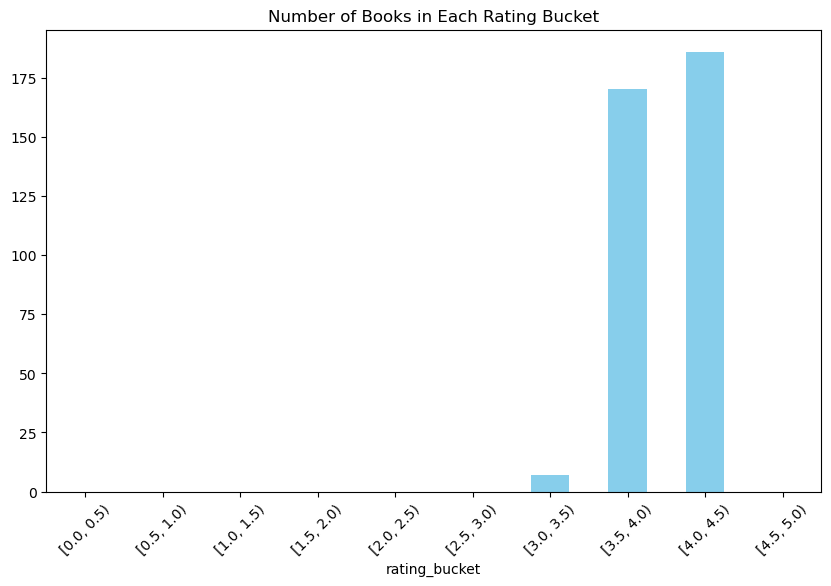

In [36]:
# Q7: Bucket the average_rating of books into 11 buckets and plot a bar graph to show the total number of books in each rating bucket.
bins = [i * 0.5 for i in range(11)]
books['rating_bucket'] = pd.cut(books['average_rating'], bins=bins, right=False)
rating_counts = books.groupby('rating_bucket').size()
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Books in Each Rating Bucket')
plt.xticks(rotation=45)
plt.show()